In [1]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


def evaluate_clusters_distribution(data, labels, centroids):
    """
    Evaluate each cluster based on its data distribution.
    Args:
        data (ndarray): The dataset (scaled).
        labels (ndarray): Cluster labels for the data.
        centroids (ndarray): Centroids of the clusters.

    Returns:
        cluster_evaluation (dict): Metrics for each cluster.
    """
    unique_labels = np.unique(labels)
    cluster_evaluation = {}

    for label in unique_labels:
        cluster_data = data[labels == label]
        centroid = centroids[label]

        # Metrics for evaluation
        intra_cluster_variance = np.var(cluster_data, axis=0).mean()
        mean_distance_to_centroid = np.linalg.norm(cluster_data - centroid, axis=1).mean()
        cluster_size = cluster_data.shape[0]

        cluster_evaluation[label] = {
            "Cluster Size": cluster_size,
            "Intra-cluster Variance": intra_cluster_variance,
            "Mean Distance to Centroid": mean_distance_to_centroid,
        }

        print(f"Cluster {label} Evaluation:")
        print(f"  Cluster Size: {cluster_size}")
        print(f"  Intra-cluster Variance: {intra_cluster_variance:.2f}")
        print(f"  Mean Distance to Centroid: {mean_distance_to_centroid:.2f}")
        print()

    return cluster_evaluation


def visualize_clusters(data, labels, centroids):
    """
    Visualize the clusters with their centroids.
    Args:
        data (ndarray): The dataset (scaled).
        labels (ndarray): Cluster labels for the data.
        centroids (ndarray): Centroids of the clusters.
    """
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200)
    plt.title("Cluster Visualization")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


# Main function for clustering and evaluation
def cluster_and_evaluate(data, n_clusters):
    """
    Perform Gaussian Mixture clustering and evaluate each cluster.
    Args:
        data (ndarray): The dataset (scaled).
        n_clusters (int): Number of clusters.

    Returns:
        cluster_evaluation (dict): Metrics for each cluster.
    """
    # Scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(scaled_data)
    centroids = gmm.means_

    # Visualize the clusters
    visualize_clusters(scaled_data, labels, centroids)

    # Evaluate clusters based on data distribution
    cluster_evaluation = evaluate_clusters_distribution(scaled_data, labels, centroids)

    return cluster_evaluation


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


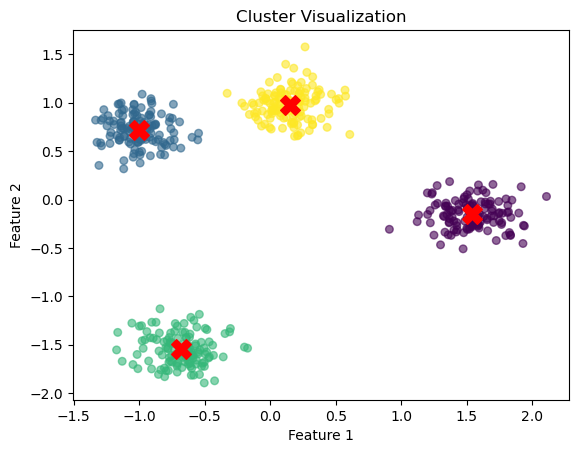

Cluster 0 Evaluation:
  Cluster Size: 125
  Intra-cluster Variance: 0.03
  Mean Distance to Centroid: 0.22

Cluster 1 Evaluation:
  Cluster Size: 125
  Intra-cluster Variance: 0.03
  Mean Distance to Centroid: 0.20

Cluster 2 Evaluation:
  Cluster Size: 125
  Intra-cluster Variance: 0.03
  Mean Distance to Centroid: 0.22

Cluster 3 Evaluation:
  Cluster Size: 125
  Intra-cluster Variance: 0.03
  Mean Distance to Centroid: 0.21



In [2]:
if __name__ == "__main__":
    # Generate synthetic data
    from sklearn.datasets import make_blobs
    data, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

    # Perform clustering and evaluation
    n_clusters = 4
    cluster_evaluation = cluster_and_evaluate(data, n_clusters)